

# **IMPLEMENTATION OF A THREE HIDDEN LAYER NEURAL NETWORK FOR MULTI-CLASS CLASSIFICATION**


1. **NumPy (`np`)**: Used for numerical computations and working with arrays.  
2. **Pandas (`pd`)**: Used for data manipulation and analysis, like handling tables or DataFrames.  
3. **Matplotlib (`plt`)**: Used for creating visualizations like graphs and charts.  

Each library serves a specific purpose in data science and machine learning workflows.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Randomly Genarated data about 3 dog bread and their characteristics(Weight_kg & Height_cm) read from CSV file by using panda

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Assignment CVPR/Assignment 2/Dog_Species_Data.csv')
data.sample(10)

,Species,Weight_kg,Height_cm
298,Beagle,11.1,40.8
347,Bulldog,21.0,37.0
456,Bulldog,26.9,31.4
403,Labrador,28.6,55.3
184,Bulldog,27.6,34.1
51,Labrador,36.9,59.3
494,Bulldog,26.7,38.9
368,Labrador,29.6,57.8
394,Bulldog,27.0,30.0
286,Labrador,38.1,55.6


This code snippet extracts data from a Pandas DataFrame (`data`) and prepares it for further analysis or modeling.

1. **`X = data[['Weight_kg', 'Height_cm']].values`**:
   - Selects two columns, **`Weight_kg`** and **`Height_cm`**, from the DataFrame as the **features** (independent variables).
   - **`.values`** converts these columns into a NumPy array, which is commonly used for mathematical operations in machine learning.

2. **`y = data['Species'].values`**:
   - Selects the column **`Species`** from the DataFrame as the **target** (dependent variable).
   - Converts it into a NumPy array for compatibility with machine learning algorithms.

**Purpose**:  
- `X` holds the input features (e.g., weight and height).  
- `y` holds the corresponding output labels (e.g., species of an animal or plant).  
This structure is typical for supervised learning tasks like classification or regression.

In [ ]:
X = data[['Weight_kg', 'Height_cm']].values
y = data['Species'].values

This code snippet processes the `y` target array to encode its labels into numerical values for machine learning algorithms, which often require numeric inputs. Here's a breakdown:

### Explanation:

1. **`classes = list(set(y))`**:
   - Converts the `y` array into a set to find all unique labels (e.g., species names).
   - Converts the set back to a list to create an ordered collection of unique labels.
   - **Example**: If `y = ['cat', 'dog', 'cat', 'bird']`, `classes = ['cat', 'dog', 'bird']` (order may vary).

2. **`y_encoded = [classes.index(label) for label in y]`**:
   - Loops through each label in `y`.
   - Finds the index of the label in the `classes` list and stores it in `y_encoded`.
   - Effectively transforms string labels into numeric values.
   - **Example**: For `y = ['cat', 'dog', 'cat', 'bird']`:
     - `classes = ['cat', 'dog', 'bird']`
     - `y_encoded = [0, 1, 0, 2]`

3. **`print(classes)`**:
   - Prints the unique class labels.
   - **Example output**: `['cat', 'dog', 'bird']`.

4. **`print(y_encoded[:10])`**:
   - Prints the first 10 encoded values of `y`.
   - **Example output**: `[0, 1, 0, 2]`.

### Purpose:
This code prepares the categorical labels (`y`) for machine learning models by converting them into numerical representations. This step is necessary for algorithms that cannot process string labels directly.

In [ ]:
classes = list(set(y))
y_encoded = [classes.index(label) for label in y]
print(classes)
print(y_encoded[:10])

['Beagle', 'Labrador', 'Bulldog']
[0, 1, 2, 2, 2, 0, 0, 0, 0, 1]


This snippet converts the encoded labels (`y_encoded`) into a **one-hot encoded** format, a common representation for categorical data in machine learning.

### Explanation:

1. **`y_one_hot = []`**:
   - Initializes an empty list to store the one-hot encoded vectors.

2. **`for label in y_encoded:`**:
   - Iterates over the list of numeric labels (`y_encoded`).

3. **`one_hot = [0] * len(classes)`**:
   - Creates a list of zeros with a length equal to the number of unique classes (from `classes`).

4. **`one_hot[label] = 1`**:
   - Sets the index corresponding to the label to `1`. This creates the one-hot encoded vector for that label.
   - **Example**: If `label = 2` and `len(classes) = 3`, `one_hot` becomes `[0, 0, 1]`.

5. **`y_one_hot.append(one_hot)`**:
   - Appends the one-hot encoded vector to the `y_one_hot` list.

6. **`print(len(y_one_hot), len(y_one_hot[0]))`**:
   - Prints the number of one-hot encoded vectors (should match the number of samples in `y`).
   - Prints the length of each one-hot encoded vector (should match the number of unique classes).

7. **`print(y_one_hot[10:])`**:
   - Prints the one-hot encoded vectors starting from index 10 onward.

### Purpose:
This step is used in machine learning, especially for classification tasks where the model outputs probabilities for each class. The one-hot encoded format is a standard way to represent categorical labels for algorithms like neural networks.

In [ ]:
y_one_hot = []
for label in y_encoded:
    one_hot = [0] * len(classes)
    one_hot[label] = 1
    y_one_hot.append(one_hot)

print(len(y_one_hot), len(y_one_hot[0]))
print(y_one_hot[10:])

500 3
[[0, 0, 1], [1, 0, 0], [0, 0, 1], [1, 0, 0], [1, 0, 0], [0, 1, 0], [0, 1, 0], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 1, 0], [1, 0, 0], [0, 1, 0], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 0, 1], [0, 0, 1], [1, 0, 0], [1, 0, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [0, 0, 1], [1, 0, 0], [1, 0, 0], [0, 0, 1], [0, 1, 0], [1, 0, 0], [1, 0, 0], [0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 0], [1, 0, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [0, 1, 0], [1, 0, 0], [0, 1, 0], [0, 0, 1], [0, 0, 1], [0, 1, 0], [0, 0, 1], [1, 0, 0], [1, 0, 0], [1, 0, 0], [0, 0, 1], [1, 0, 0], [0, 0, 1], [1, 0, 0], [1, 0, 0], [1, 0, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0], [0, 0, 1], [0, 1, 0], [1, 0, 0], [1, 0, 0], [0, 1, 0], [1, 0, 0], [1, 0, 0], [0, 0, 1], [1, 0, 0], [0, 1, 0], [0, 0, 1], [0, 1, 0], [0, 1, 0], [0, 0, 1], [1, 0, 0], [0, 0, 1], [0, 0, 1], [1, 0, 0], [0, 0, 1], [0, 0, 1], [0, 0, 1], [0, 0, 1], [1, 0, 0], [0, 0, 1], [1, 0, 0], [1, 0, 0], [1, 0, 0], [0, 1, 0], [0, 1, 0], [0, 1, 0], [0,

This code processes a CSV file containing dog species data to prepare it for analysis and visualization:

1. **Load Data**: Reads a CSV file into a Pandas DataFrame.
2. **Extract Features and Labels**: `X` contains features (e.g., weight and height), and `y` contains species labels.
3. **Encode Labels**: Converts species names (`y`) into numeric encoded labels and one-hot encodes them.
4. **Print Details**: Outputs classes, encoded labels, and the shape of the one-hot encoded labels for verification.
5. **Scatter Plot**: Visualizes the relationship between weight and height for different dog species using a scatter plot.

The plot distinguishes species using different markers and colors.

Classes: ['Beagle' 'Bulldog' 'Labrador']
Encoded Labels (first 10): [0 2 1 1 1 0 0 0 0 2]
Shape of One-Hot Encoded Labels: (500, 3)
Example One-Hot Encoded Labels (after 10th row): [[0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


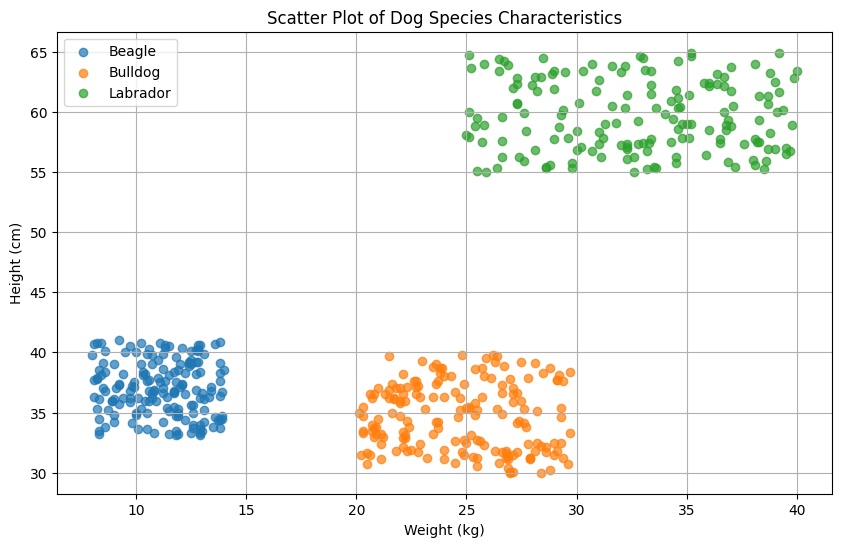

In [ ]:
file_path = "/content/drive/MyDrive/Assignment CVPR/Assignment 2/Dog_Species_Data.csv"
data = pd.read_csv(file_path)

# Extract features (X) and labels (y)
X = data.iloc[:, 1:].values
y = data.iloc[:, 0].values

# Encode classes
classes, y_encoded = np.unique(y, return_inverse=True)

# One-hot encode labels
y_one_hot = np.eye(len(classes))[y_encoded]

# Print classes, encoded labels, and one-hot encoding details
print("Classes:", classes)
print("Encoded Labels (first 10):", y_encoded[:10])
print("Shape of One-Hot Encoded Labels:", y_one_hot.shape)
print("Example One-Hot Encoded Labels (after 10th row):", y_one_hot[10:15])

# Scatter plot of features
plt.figure(figsize=(10, 6))
for class_idx, class_name in enumerate(classes):
    plt.scatter(
        X[y_encoded == class_idx, 0],  # Weight feature
        X[y_encoded == class_idx, 1],  # Height feature
        label=class_name,
        alpha=0.7
    )

# Add plot details
plt.title("Scatter Plot of Dog Species Characteristics")
plt.xlabel("Weight (kg)")
plt.ylabel("Height (cm)")
plt.legend()
plt.grid(True)
plt.show()


This code splits the dataset into training and test sets for model evaluation:

1. **Shuffle Data**: Randomly shuffles the data using `np.random.permutation` to ensure the split is not biased.
2. **Define Split Ratio**: Sets 80% of the data for training and 20% for testing.
3. **Split Indices**:
   - Divides the shuffled indices into training (`train_indices`) and test (`test_indices`) based on the split ratio.
4. **Split Data**:
   - Uses the indices to split the feature matrix `X` and one-hot encoded labels `y_one_hot` into training and test sets.
   - `X_train`, `y_train`: Training data.
   - `X_test`, `y_test`: Test data.
5. **Print Shapes**: Displays the shapes of the training and test datasets for verification.

### Purpose:
Prepares separate training and test datasets, ensuring randomness and proper proportions, which is essential for building and evaluating machine learning models.

In [ ]:
# Shuffles the data by generating random indices
indices = np.random.permutation(len(X))

# Defines the split ratio (80% train, 20% test)
split_ratio = 0.8
train_size = int(len(X) * split_ratio)

# Splits the indices into training and test sets
train_indices = indices[:train_size]
test_indices = indices[train_size:]

X_train = X[train_indices]
X_test = X[test_indices]
y_train = y_one_hot[train_indices]
y_test = y_one_hot[test_indices]

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (400, 2)
X_test shape: (100, 2)
y_train shape: (400, 3)
y_test shape: (100, 3)


This code normalizes the features in the dataset, ensuring they have a mean of 0 and a standard deviation of 1, which is essential for many machine learning models. Here's what it does:

1. **`normalize_features(X)`**:
   - **Compute Feature Means**: Calculates the mean of each feature (column) across all samples (rows).
   - **Compute Feature Standard Deviations (STDs)**: Calculates the standard deviation for each feature.
   - **Normalize Features**: Scales each feature value by subtracting its mean and dividing by its standard deviation:  
     \[
     x_{\text{normalized}} = \frac{x - \text{mean}}{\text{std}}
     \]

2. **Normalize Training and Test Data**:
   - Calls `normalize_features` for `X_train` and `X_test`.
   - Converts the normalized data to NumPy arrays for compatibility with machine learning libraries.

3. **Print Examples**:
   - Prints the first 10 rows of the normalized training and test datasets for inspection.

### Purpose:
Normalization ensures all features contribute equally to the model, preventing features with larger scales from dominating the learning process.

In [ ]:

def normalize_features(X):

    feature_means = [sum(feature) / len(feature) for feature in zip(*X)]

    feature_stds = [
        (sum((x - mean) ** 2 for x in feature) / len(feature)) ** 0.5
        for feature, mean in zip(zip(*X), feature_means)
    ]

    X_normalized = [
        [(x - mean) / std for x, mean, std in zip(row, feature_means, feature_stds)]
        for row in X
    ]

    return X_normalized


# Convert the normalized data to NumPy arrays
X_train_normalized = np.array(normalize_features(X_train))
X_test_normalized = np.array(normalize_features(X_test))

print(X_train_normalized[:10])
print()
print(X_test_normalized[:10])

[[ 1.22024835  1.49361328]
 [ 0.39765102  1.08712906]
 [-1.37574061 -0.31394419]
 [-1.31164211 -0.28799839]
 [-1.18344513 -0.77232001]
 [ 0.23740479  1.82226009]
 [-1.31164211 -0.512862  ]
 [-0.27538315 -0.70313121]
 [-1.57871917 -0.6339424 ]
 [ 0.32286945  0.98334586]]

[[ 1.64500981  1.28606402]
 [-1.24491568 -0.28295905]
 [-0.08894548 -0.6484701 ]
 [-0.23879347 -0.58606578]
 [-1.27702596 -0.6306403 ]
 [ 1.09913499  1.82095825]
 [-1.04155055 -0.62172539]
 [ 0.23215735  1.33955345]
 [ 0.31778477 -0.45234222]
 [-0.01402149 -0.48800183]]


**Implementation of a Fully Connected Neural Network with Custom Activation and Backpropagation**

In [ ]:
class NeuralNetwork:
    def __init__(self):
        inputLayerNeurons = 2
        hiddenLayer1Neurons = 15
        hiddenLayer2Neurons = 15
        hiddenLayer3Neurons = 15
        outputLayerNeurons = 3
        self.learning_rate = 0.00001

        self.W_H1 = np.random.randn(inputLayerNeurons, hiddenLayer1Neurons)
        self.W_H2 = np.random.randn(hiddenLayer1Neurons, hiddenLayer2Neurons)
        self.W_H3 = np.random.randn(hiddenLayer2Neurons, hiddenLayer3Neurons)
        self.W_O = np.random.randn(hiddenLayer3Neurons, outputLayerNeurons)

        self.b_H1 = np.random.randn(1, hiddenLayer1Neurons)
        self.b_H2 = np.random.randn(1, hiddenLayer2Neurons)
        self.b_H3 = np.random.randn(1, hiddenLayer3Neurons)
        self.b_O = np.random.randn(1, outputLayerNeurons)

    def erelu(self, x, der=False):
        if der:
            return np.where(x > 0, 1, np.exp(x))
        else:
             return np.where(x > 0, x, np.exp(x))

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def feedForward(self, X):
        # Layer 1
        self.hidden_input1 = np.dot(X, self.W_H1) + self.b_H1
        self.hidden_output1 = self.erelu(self.hidden_input1)

        # Layer 2
        self.hidden_input2 = np.dot(self.hidden_output1, self.W_H2) + self.b_H2
        self.hidden_output2 = self.erelu(self.hidden_input2)

        # Layer 3
        self.hidden_input3 = np.dot(self.hidden_output2, self.W_H3) + self.b_H3
        self.hidden_output3 = self.erelu(self.hidden_input3)

        # Output layer
        self.output_input = np.dot(self.hidden_output3, self.W_O) + self.b_O
        pred = self.softmax(self.output_input)

        return pred

    def backPropagation(self, X, Y, pred):
        # Output layer error and delta
        output_error = Y - pred
        output_delta = output_error

        # Hidden layer 3 error and delta
        hidden_error3 = output_delta.dot(self.W_O.T)
        hidden_delta3 = hidden_error3 * self.erelu(self.hidden_input3, der=True)

        # Hidden layer 2 error and delta
        hidden_error2 = hidden_delta3.dot(self.W_H3.T)
        hidden_delta2 = hidden_error2 * self.erelu(self.hidden_input2, der=True)

        # Hidden layer 1 error and delta
        hidden_error1 = hidden_delta2.dot(self.W_H2.T)
        hidden_delta1 = hidden_error1 * self.erelu(self.hidden_input1, der=True)

        # Updates weights and biases
        self.W_O += self.learning_rate * self.hidden_output3.T.dot(output_delta)
        self.b_O += self.learning_rate * np.sum(output_delta, axis=0, keepdims=True)

        self.W_H3 += self.learning_rate * self.hidden_output2.T.dot(hidden_delta3)
        self.b_H3 += self.learning_rate * np.sum(hidden_delta3, axis=0, keepdims=True)

        self.W_H2 += self.learning_rate * self.hidden_output1.T.dot(hidden_delta2)
        self.b_H2 += self.learning_rate * np.sum(hidden_delta2, axis=0, keepdims=True)

        self.W_H1 += self.learning_rate * X.T.dot(hidden_delta1)
        self.b_H1 += self.learning_rate * np.sum(hidden_delta1, axis=0, keepdims=True)

    def train(self, X, Y):
        # Forward pass
        output = self.feedForward(X)

        # Backward pass
        self.backPropagation(X, Y, output)


### 1. **`categorical_cross_entropy(y_true, y_pred)`**:
   - **Purpose**: Computes the categorical cross-entropy loss, a commonly used loss function for multi-class classification problems.
   - **Steps**:
     1. **Clip Predictions**: `np.clip(y_pred, 1e-9, 1 - 1e-9)` ensures numerical stability by keeping predictions in the range \([1e-9, 1 - 1e-9]\). This prevents issues with taking the logarithm of 0.
     2. **Compute Loss**: Uses the formula:  
        \[
        \text{loss} = - \frac{1}{N} \sum (\text{y\_true} \cdot \log(\text{y\_pred}))
        \]  
        where \(N\) is the number of samples. It calculates the negative log likelihood of the true class probabilities (`y_true`) based on the predicted probabilities (`y_pred`).
   - **Output**: Returns the average loss across all samples.

---

### 2. **`accuracy(y_true, y_pred)`**:
   - **Purpose**: Measures the proportion of correct predictions.
   - **Steps**:
     1. **Find Predicted Class**: `np.argmax(y_pred, axis=1)` retrieves the index of the highest predicted probability for each sample (predicted class).
     2. **Find True Class**: `np.argmax(y_true, axis=1)` retrieves the index of the true class for each sample.
     3. **Compare Classes**: Computes the percentage of samples where the predicted class matches the true class.
   - **Output**: Returns the accuracy as a value between 0 and 1.

---

### Usage:
- **`categorical_cross_entropy`** is used to penalize incorrect predictions during training.
- **`accuracy`** provides a metric for model performance evaluation, indicating how well the model predicts the correct class.

In [ ]:
def categorical_cross_entropy(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-9, 1 - 1e-9)
    return -np.sum(y_true * np.log(y_pred)) / y_true.shape[0]

def accuracy(y_true, y_pred):
    return np.mean(np.argmax(y_true, axis=1) == np.argmax(y_pred, axis=1))



# **Training**

In [ ]:
# Training
NN = NeuralNetwork()
epochs = 10000
err = []
acc = []

for epoch in range(epochs):
    NN.train(X_train_normalized, y_train)
    y_pred = NN.feedForward(X_train_normalized)
    err.append(categorical_cross_entropy(y_train, y_pred))
    acc.append(accuracy(y_train, y_pred))

    if epoch % 100 == 0:
        print(f"Epoch {epoch}/{epochs} - Loss: {err[epoch]:.4f}, Accuracy: {acc[epoch]:.4f}")

Epoch 0/10000 - Loss: 4.4692, Accuracy: 0.4500
Epoch 100/10000 - Loss: 0.0433, Accuracy: 0.9825
Epoch 200/10000 - Loss: 0.0302, Accuracy: 0.9900
Epoch 300/10000 - Loss: 0.0253, Accuracy: 0.9900
Epoch 400/10000 - Loss: 0.0147, Accuracy: 0.9975
Epoch 500/10000 - Loss: 0.0084, Accuracy: 1.0000
Epoch 600/10000 - Loss: 0.0075, Accuracy: 1.0000
Epoch 700/10000 - Loss: 0.0055, Accuracy: 1.0000
Epoch 800/10000 - Loss: 0.0111, Accuracy: 0.9950
Epoch 900/10000 - Loss: 0.0050, Accuracy: 1.0000
Epoch 1000/10000 - Loss: 0.0024, Accuracy: 1.0000
Epoch 1100/10000 - Loss: 0.0028, Accuracy: 1.0000
Epoch 1200/10000 - Loss: 0.0022, Accuracy: 1.0000
Epoch 1300/10000 - Loss: 0.0024, Accuracy: 1.0000
Epoch 1400/10000 - Loss: 0.0022, Accuracy: 1.0000
Epoch 1500/10000 - Loss: 0.0017, Accuracy: 1.0000
Epoch 1600/10000 - Loss: 0.0015, Accuracy: 1.0000
Epoch 1700/10000 - Loss: 0.0013, Accuracy: 1.0000
Epoch 1800/10000 - Loss: 0.0012, Accuracy: 1.0000
Epoch 1900/10000 - Loss: 0.0011, Accuracy: 1.0000
Epoch 2000/1

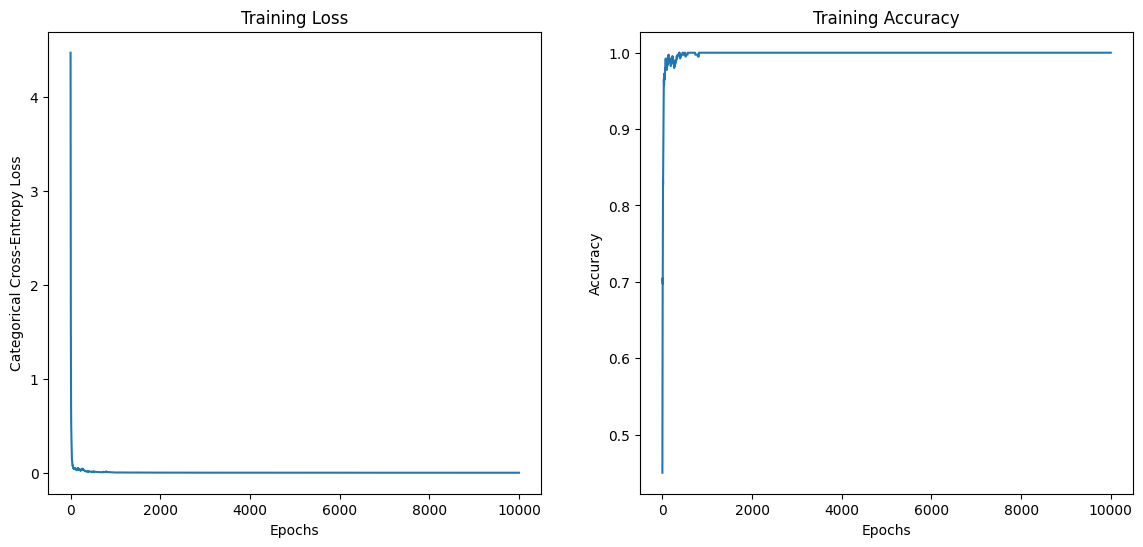

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plot the error
ax[0].plot(err)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Categorical Cross-Entropy Loss')
ax[0].set_title('Training Loss')

# Plot the accuracy
ax[1].plot(acc)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Training Accuracy')

plt.show()

In [ ]:
y_test_pred = NN.feedForward(X_test_normalized)

test_loss = categorical_cross_entropy(y_test, y_test_pred)
test_accuracy = accuracy(y_test, y_test_pred)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.2%}")

Test Loss: 0.0004
Test Accuracy: 100.00%


# **CONFUSION MATRIX**

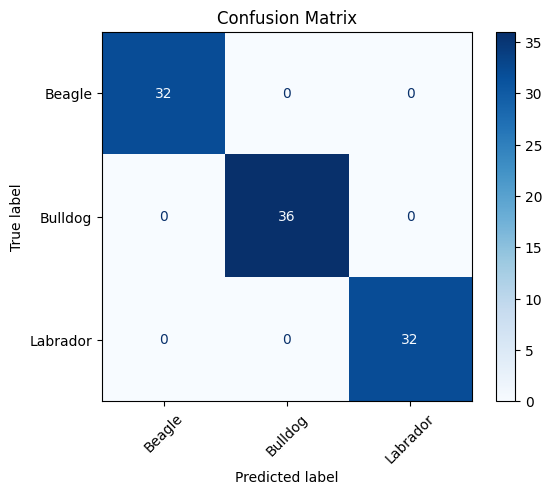

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_test_pred_labels = np.argmax(y_test_pred, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Create confusion matrix
cm = confusion_matrix(y_test_labels, y_test_pred_labels)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title('Confusion Matrix')
plt.show()